# Feature Extraction with Eigen Face

<img src=components/feature_extraction.png>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2

from sklearn.decomposition import PCA

import pickle

In [29]:
# Load data
data = pickle.load(open('data/data_images_100_100.pickle', 'rb'))
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.780392,0.741176,0.733333,0.709804,0.717647,0.721569,0.698039,0.690196,0.733333,0.709804,...,0.423529,0.427451,0.435294,0.447059,0.454902,0.474510,0.462745,0.458824,0.466667,female
1,0.121569,0.098039,0.129412,0.109804,0.113725,0.113725,0.121569,0.129412,0.137255,0.137255,...,0.113725,0.090196,0.117647,0.086275,0.133333,0.098039,0.137255,0.215686,0.070588,female
2,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529,female
3,0.533333,0.498039,0.447059,0.376471,0.376471,0.368627,0.368627,0.454902,0.584314,0.639216,...,0.211765,0.266667,0.262745,0.290196,0.356863,0.380392,0.403922,0.403922,0.376471,female
4,0.917647,0.925490,0.917647,0.909804,0.898039,0.729412,0.545098,0.411765,0.231373,0.184314,...,0.941176,0.929412,0.929412,0.937255,0.933333,0.933333,0.949020,0.945098,0.945098,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,0.396078,0.388235,0.478431,0.376471,0.443137,0.529412,0.537255,0.486275,0.619608,0.627451,...,0.462745,0.482353,0.501961,0.509804,0.529412,0.533333,0.521569,0.478431,0.435294,male
2166,0.062745,0.070588,0.066667,0.062745,0.066667,0.062745,0.054902,0.058824,0.062745,0.074510,...,0.901961,0.909804,0.913725,0.917647,0.921569,0.921569,0.917647,0.913725,0.909804,male
2168,0.698039,0.701961,0.705882,0.705882,0.709804,0.713725,0.717647,0.717647,0.709804,0.705882,...,0.560784,0.552941,0.541176,0.549020,0.568627,0.592157,0.619608,0.650980,0.674510,male
2169,0.145098,0.145098,0.145098,0.145098,0.149020,0.156863,0.156863,0.152941,0.152941,0.152941,...,0.164706,0.172549,0.188235,0.215686,0.239216,0.266667,0.282353,0.282353,0.278431,male


## Eigen Face

In [30]:
X = data.drop('gender', axis=1).values
X

array([[0.78039216, 0.74117647, 0.73333333, ..., 0.4627451 , 0.45882353,
        0.46666667],
       [0.12156863, 0.09803922, 0.12941176, ..., 0.1372549 , 0.21568627,
        0.07058824],
       [0.19607843, 0.19215686, 0.1372549 , ..., 0.84313725, 0.83137255,
        0.82352941],
       ...,
       [0.69803922, 0.70196078, 0.70588235, ..., 0.61960784, 0.65098039,
        0.6745098 ],
       [0.14509804, 0.14509804, 0.14509804, ..., 0.28235294, 0.28235294,
        0.27843137],
       [0.71372549, 0.72156863, 0.72156863, ..., 0.74509804, 0.74509804,
        0.74509804]])

In [31]:
mean_face = X.mean(axis=0) ## flatten mean face
mean_face.shape

(10000,)

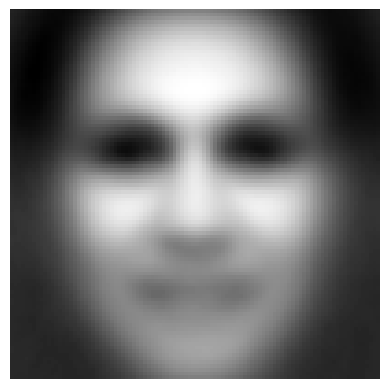

In [32]:
plt.imshow(mean_face.reshape((100, 100)), cmap='gray')
plt.axis('off')
plt.show()

## Subtract data with the mean face

In [33]:
X_t = X - mean_face ## subtract mean face

## Apply data to PCA


- Find the right number of components - elbow
- With right number of component compute the PCA

In [34]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [35]:
exp_var = pd.DataFrame()
exp_var['explained_var'] = pca.explained_variance_ratio_
exp_var['cumulative_var'] = pca.explained_variance_ratio_.cumsum()
exp_var['principal_component'] = np.arange(1, len(exp_var) + 1)
exp_var.head()

,explained_var,cumulative_var,principal_component
0,0.252894,0.252894,1
1,0.114710,0.367604,2
2,0.106131,0.473735,3
3,0.052142,0.525877,4
4,0.033223,0.559101,5


<Axes: title={'center': 'Cumulative Explained Variance'}>

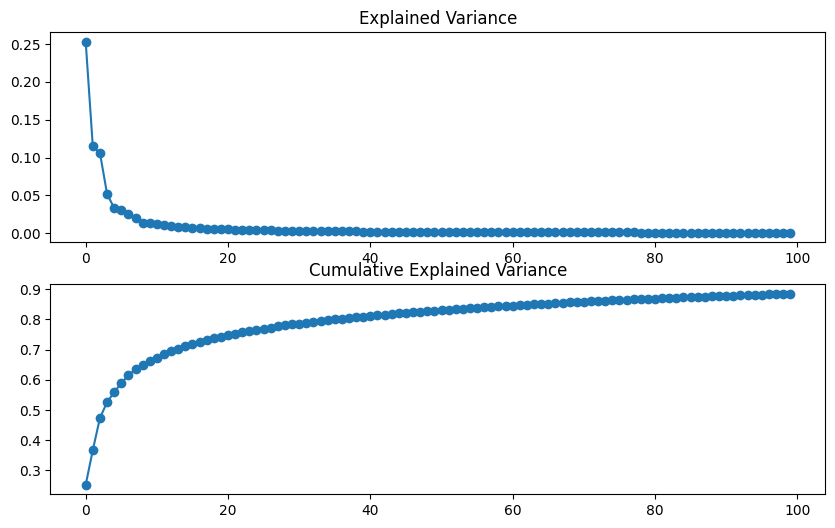

In [36]:
fig, ax = plt.subplots(figsize=(10, 6), nrows = 2)

exp_var['explained_var'].head(100).plot(kind='line', marker= 'o', ax=ax[0], title='Explained Variance')
exp_var['cumulative_var'].head(100).plot(kind='line', marker = 'o', ax=ax[1], title='Cumulative Explained Variance')

with 50 components we get 80% of the variance

In [37]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)
pca_data.shape

(4319, 50)

In [38]:
y = data['gender'].values
np.savez('data/pca_data_target.npz', pca_data=pca_data, y=y)


In [39]:
pca_dict = {}
pca_dict['pca'] = pca_50
pca_dict['mean_face'] = mean_face

In [40]:
import pickle
pickle.dump(pca_dict, open('model/pca_dict.pickle', 'wb'))

# Visualize Eigen Image

In [41]:
## load pca_dict

In [42]:
pca_data_inv = pca_50.inverse_transform(pca_data)
pca_data_inv.shape

(4319, 10000)

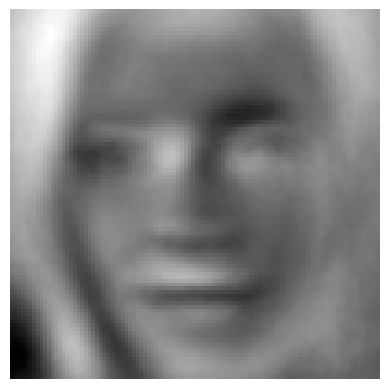

In [43]:
eigen_img = pca_data_inv[0, :].reshape((100,100))
plt.imshow(eigen_img, cmap='gray')
plt.axis('off')
plt.show()

In [50]:
def display_images(X, y, num_images=20, seed=None):
    if seed is not None:
        np.random.seed(seed)

    pics = np.random.randint(0, len(X), num_images)
    plt.figure(figsize=(15, 8))

    for i, pic in enumerate(pics):
        plt.subplot(4, 10, i + 1)
        img = X[pic:pic + 1].reshape((100, 100))
        plt.imshow(img, cmap='gray')
        plt.title('{}'.format(y[pic]))
        plt.xticks([])
        plt.yticks([])

    plt.show()


Before PCA: 


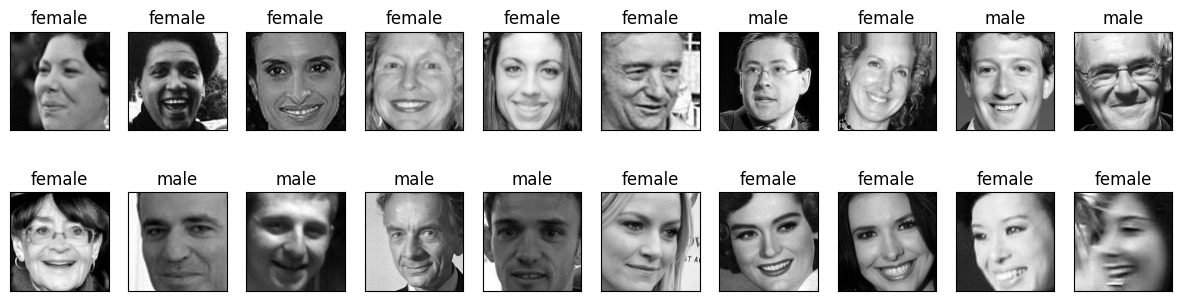

After PCA: 


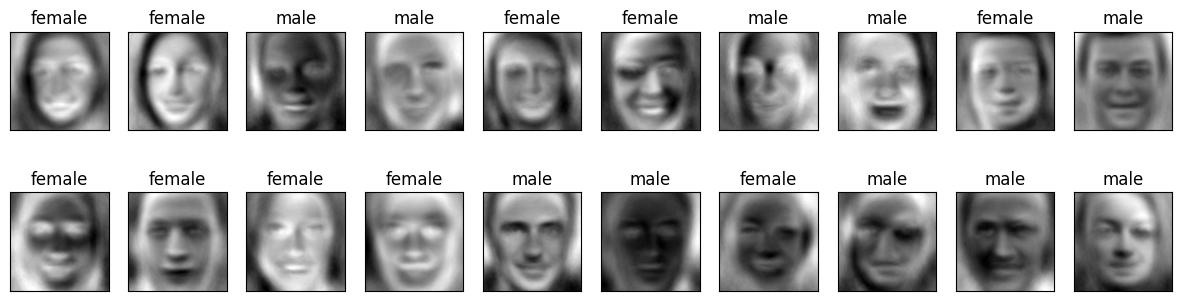

In [51]:
print('Before PCA: ')
## display images before pca
display_images(X, y)

print('After PCA: ')
## display images after pca
display_images(pca_data_inv, y)